### Hierarchical Clustering

Hierarchical clustering is a popular and intuitive method for clustering data points in machine learning. It can be broadly classified into two types: Agglomerative and Divisive.

**Types of Hierarchical Clustering:**

1. **Agglomerative Hierarchical Clustering:**
   - Starts with each data point as an individual cluster.
   - Iteratively merges the closest clusters until only one cluster or a specified number of clusters remain.
   - The algorithm:
     1. Compute the proximity matrix.
     2. Let each data point be a cluster.
     3. Repeat merging the two closest clusters and update the proximity matrix until only one cluster remains.
     4. Key operation: computing the proximity of two clusters.

2. **Divisive Hierarchical Clustering:**
   - Starts with all data points in a single cluster.
   - Iteratively splits the cluster into smaller clusters until each data point is an individual cluster.

**Calculating Distances Between Clusters:**
Various approaches include:
- **MIN (Single-Linkage):** Minimum distance between points in different clusters.
- **MAX (Complete-Linkage):** Maximum distance between points in different clusters.
- **Group Average:** Average distance between all pairs of points in different clusters.
- **Distance Between Centroids:** Distance between the centroids of clusters.
- **Ward’s Method:** Minimizes the sum of squared differences within all clusters.

**Advantages and Limitations:**
- **Pros:**
  - Can handle non-elliptical shapes (especially MIN).
  - Does well with noise (especially MAX and Ward’s method).
- **Cons:**
  - High space and time complexity (O(n²) and O(n³) respectively).
  - Bias towards globular clusters in some methods (MAX, Group Average, Ward’s method).



**Thresholding** is a method used in hierarchical clustering to determine the number of clusters. It involves setting a threshold distance on the dendrogram, which represents the maximum distance at which clusters should be merged.

**The dendrogram** visualizes this process, showing how clusters are merged at each step based on the distance between them.

By following these steps and using the dendrogram, we can visually inspect the clustering process and decide the number of clusters by choosing a threshold distance.

**Example: Agglomerative Hierarchical Clustering**




#### Step-by-Step Clustering with Dendrogram:

1. **Initial State:**
   - Each point is its own cluster: {A}, {B}, {C}, {D}, {E}, {F}.

2. **First Merge:**
   - Find the closest points/clusters and merge them. For instance, if points A and B are closest, merge them to form cluster {AB}.

3. **Subsequent Merges:**
   - Continue finding the closest clusters and merging them.
   - The process continues with clusters like {C} and {AB}, then merging with {D}, and so on.

4. **Final Cluster:**
   - Continue until all points are in a single cluster.

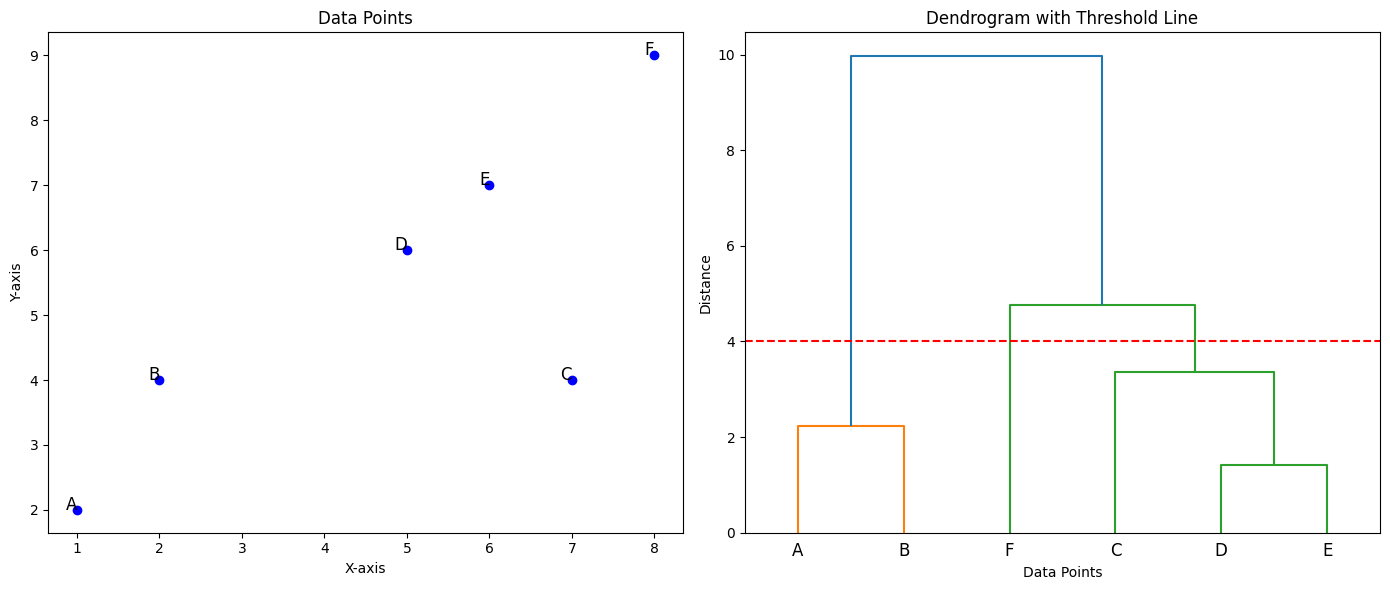

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data = np.array([[1, 2], [2, 4], [7, 4], [5, 6], [6, 7], [8, 9]])

Z = linkage(data, method='ward')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
threshold = 4

ax1.scatter(data[:, 0], data[:, 1], c='blue')
for i, txt in enumerate(['A', 'B', 'C', 'D', 'E', 'F']):
    ax1.annotate(txt, (data[i, 0], data[i, 1]), fontsize=12, ha='right')
ax1.set_title('Data Points')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')

dendrogram(Z, labels=['A', 'B', 'C', 'D', 'E', 'F'], ax=ax2)
ax2.set_title('Dendrogram')
ax2.set_xlabel('Data Points')
ax2.set_ylabel('Distance')

ax2.axhline(y=threshold, color='r', linestyle='--')
ax2.set_title('Dendrogram with Threshold Line')
ax2.set_xlabel('Data Points')
ax2.set_ylabel('Distance')

plt.tight_layout()
plt.show()


### DBSCAN:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is well-suited for datasets with noise and clusters of varying shapes and sizes. Unlike hierarchical clustering, which groups data points based on their distances in a hierarchical manner, DBSCAN groups data points based on their density.

**Clustering Overview:**
- **Density-Based Clustering:** Groups points that are closely packed together, marking points in sparse regions as outliers.
- **Epsilon (ε):** The maximum distance between two points to be considered neighbors.
- **MinPts:** The minimum number of points required to form a dense region (cluster).

**DBSCAN Algorithm:**
1. **Core Points:** Points with at least `MinPts` neighbors within `ε` distance.
2. **Border Points:** Points within `ε` distance of a core point but with fewer than `MinPts` neighbors.
3. **Noise Points:** Points that are not core points or border points.

**Steps:**
1. **Label Points:** Classify each point as core, border, or noise.
2. **Form Clusters:** Connect core points and their neighbors to form clusters.
3. **Expand Clusters:** Add border points to the clusters.

**Advantages and Limitations:**
- **Pros:**
  - Can find arbitrarily shaped clusters.
  - Handles noise well.
  - Does not require the number of clusters to be specified.
- **Cons:**
  - Sensitive to parameter settings (ε and MinPts).
  - Not suitable for datasets with varying densities.

### Step-by-Step DBSCAN Clustering:

1. **Initial State:**
   - Analyze the data points and their distances to determine neighbors within the `ε` radius.

2. **Identify Core Points:**
   - Points with at least `MinPts` neighbors within `ε` are classified as core points.

3. **Expand Clusters:**
   - Start from a core point and recursively include all points that are within `ε` distance, forming a cluster.
   - Include border points connected to core points.

4. **Label Noise Points:**
   - Points not connected to any core points and not within `ε` distance of any core points are labeled as noise.



DBSCAN effectively identifies clusters of varying shapes and sizes, making it a powerful tool for data analysis, especially in noisy datasets. By adjusting the `ε` and `MinPts` parameters, we can fine-tune the algorithm to better suit the dataset at hand.

Let's see this in action with our example code:

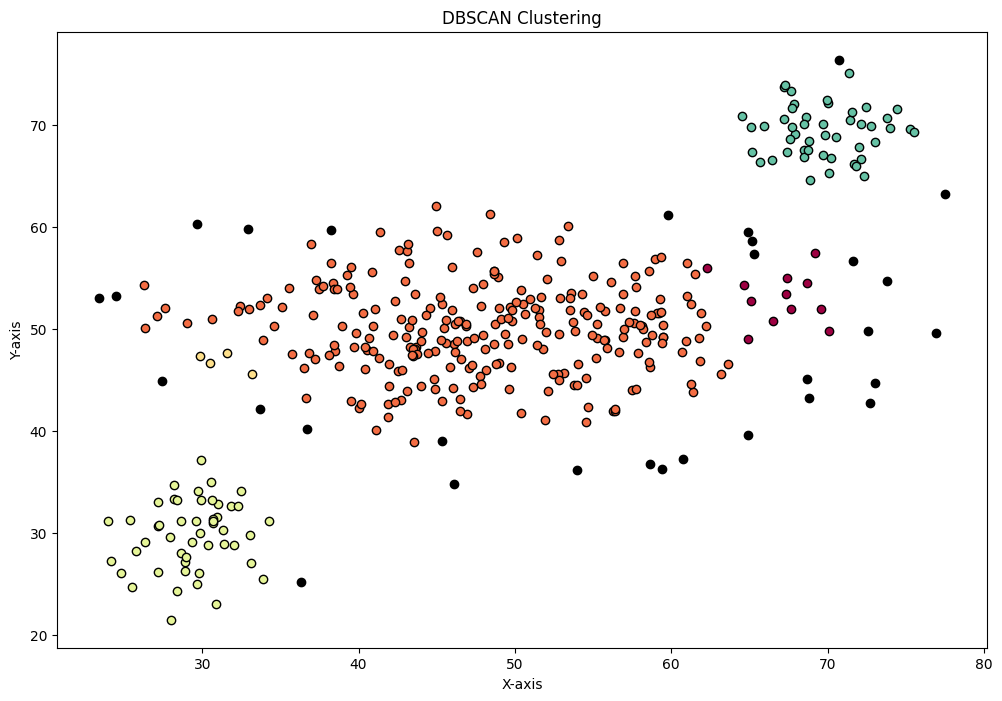

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


np.random.seed(0)
n_points = 300
data = np.random.randn(n_points, 2) * [10, 5] + [50, 50]

data = np.vstack([data, np.random.randn(50, 2) * [3, 3] + [30, 30], np.random.randn(50, 2) * [3, 3] + [70, 70]])

dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(data)


plt.figure(figsize=(12, 8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (labels == k)
    xy = data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


**B**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Load the dataset and display the first few rows

In [ ]:
data = pd.read_excel('UnSup-Data-2024.xlsx')
data = data.drop(columns=['AGE', 'MARRIED', 'KIDS'])

print(data.head())

   ID  EDUC  LIFECL  OCCAT  RISK  HHOUSES  WSAVED  SPENDMOR  NWCAT  INCCL
0   1     2       2      1     3        1       1         5      3      4
1   2     4       5      2     3        0       2         5      5      5
2   3     1       3      2     2        1       2         4      4      4
3   4     1       3      2     2        1       2         4      3      4
4   5     3       5      1     2        1       3         3      5      5


PCA is a powerful technique for reducing the dimensionality of data, visualizing high-dimensional datasets, and uncovering the underlying structure in the data. It is widely used in various fields such as machine learning, statistics, and data analysis.

Perform PCA for visualization and plot the PCA results with density-based color gradient

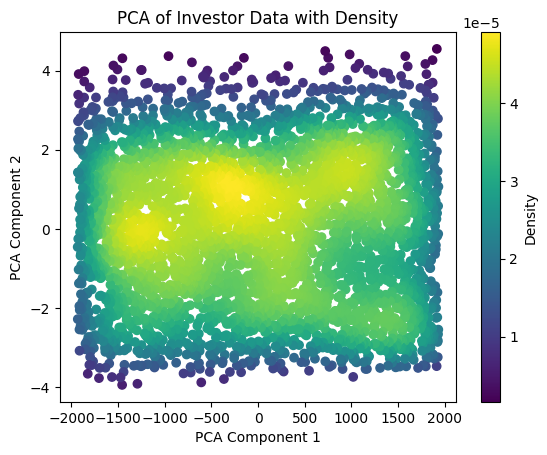

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

xy = np.vstack([pca_result[:,0], pca_result[:,1]])
z = gaussian_kde(xy)(xy)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=z, cmap='viridis')
plt.title('PCA of Investor Data with Density')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Density')
plt.show()


**Metrics**


1. **Silhouette Score**:
   - The Silhouette Score measures the quality of clustering by assessing how well-separated the clusters are.
   - It ranges from -1 to 1, where a score close to 1 indicates that the samples are far from neighboring clusters, a score of 0 indicates overlapping clusters, and a score close to -1 indicates that samples are assigned to the wrong clusters.
   - Higher Silhouette Scores suggest better clustering, with values closer to 1 indicating dense, well-separated clusters.

2. **Davies-Bouldin Index**:
   - The Davies-Bouldin Index (DBI) is another metric for evaluating clustering performance.
   - It measures the average similarity between each cluster and its most similar cluster, where similarity is defined based on the ratio of within-cluster scatter to between-cluster separation.
   - Lower values of the DBI indicate better clustering, with a value of 0 indicating perfectly separated clusters.
   - The DBI is particularly useful when clusters have different sizes and densities, as it penalizes clusters with high intra-cluster similarity and low inter-cluster similarity.


1- Apply DBSCAN Clustering

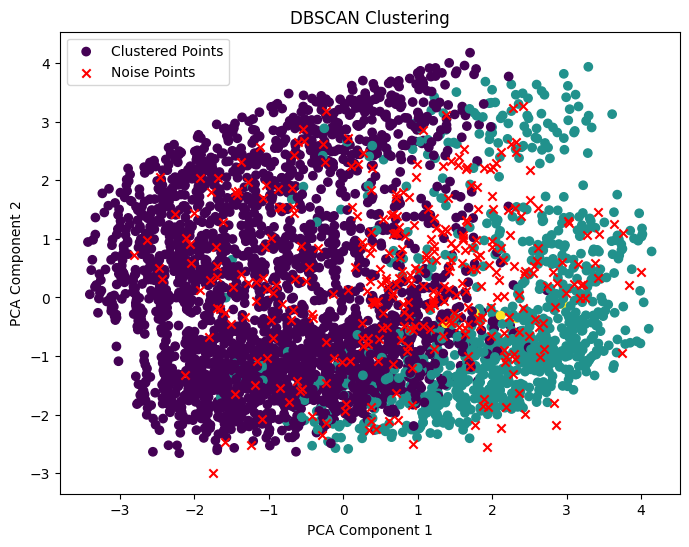



DBSCAN Clustering Evaluation:
Number of clusters: 3
Silhouette Score: 0.12006107066847153
Davies-Bouldin Index: 2.970563676468323


In [ ]:
dbscan = DBSCAN(eps=2.2, min_samples=8)
dbscan_labels = dbscan.fit_predict(scaled_features)

clustered_points = pca_features[dbscan_labels != -1]
noise_points = pca_features[dbscan_labels == -1]

plt.figure(figsize=(8, 6))
plt.scatter(clustered_points[:, 0], clustered_points[:, 1], c=dbscan_labels[dbscan_labels != -1], cmap='viridis', label='Clustered Points')
plt.scatter(noise_points[:, 0], noise_points[:, 1], color='red', marker='x', label='Noise Points')

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
print('\n')
num_clusters = len(np.unique(dbscan_labels)) - 1  # Subtract 1 for the noise points
silhouette_avg = silhouette_score(scaled_features, dbscan_labels)
dbscan_db_index = davies_bouldin_score(scaled_features, dbscan_labels)

print("DBSCAN Clustering Evaluation:")
print("Number of clusters:", num_clusters)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", dbscan_db_index)


2- Apply Hierarchical Clustering

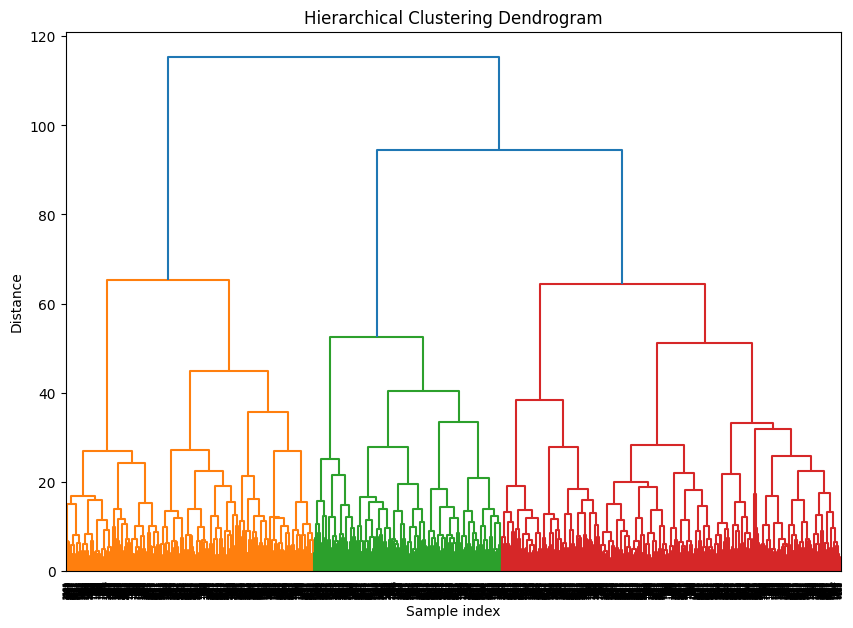

In [ ]:
Z = linkage(scaled_features, method='ward')
hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

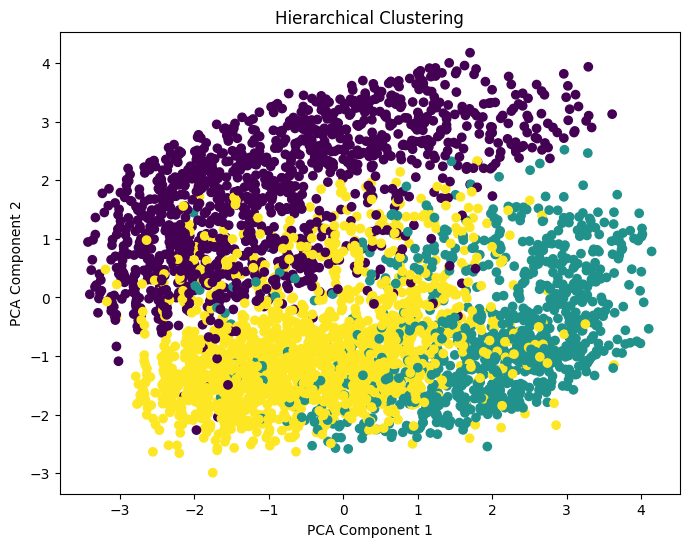



Hierarchical Clustering Evaluation:
Number of clusters: 3
Silhouette Score: 0.12495818182444206
Davies-Bouldin Index: 2.290833361211867


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
print('\n')

hierarchical_num_clusters = len(np.unique(hierarchical_labels))
hierarchical_silhouette_avg = silhouette_score(scaled_features, hierarchical_labels)
hierarchical_dbi = davies_bouldin_score(scaled_features, hierarchical_labels)

print("Hierarchical Clustering Evaluation:")
print("Number of clusters:", hierarchical_num_clusters)
print("Silhouette Score:", hierarchical_silhouette_avg)
print("Davies-Bouldin Index:", hierarchical_dbi)

3- Apply K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


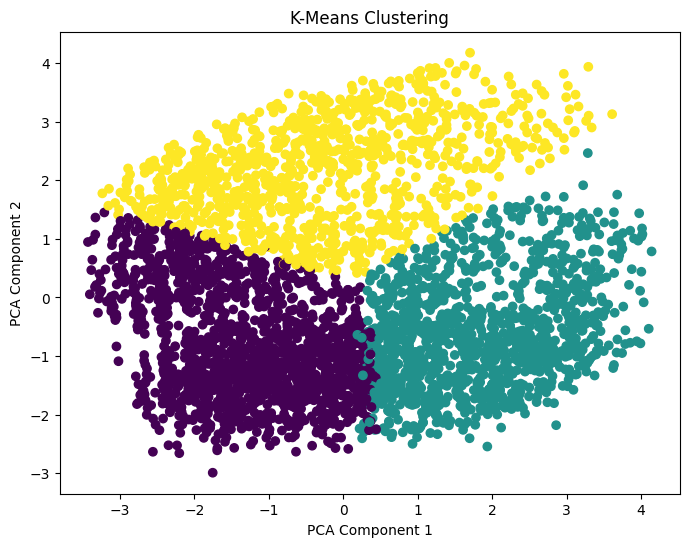



K-Means Clustering Evaluation:
Number of clusters: 3
Silhouette Score: 0.1494995639897669
Davies-Bouldin Index: 1.936067774948856


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
print('\n')

kmeans_num_clusters = len(np.unique(kmeans_labels))
kmeans_silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
kmeans_dbi = davies_bouldin_score(scaled_features, kmeans_labels)

print("K-Means Clustering Evaluation:")
print("Number of clusters:", kmeans_num_clusters)
print("Silhouette Score:", kmeans_silhouette_avg)
print("Davies-Bouldin Index:", kmeans_dbi)

# Supervised learning

**A**


**What is the Gini Impurity Index?**
The Gini Impurity Index, also known as the Gini Index, is a measure used in decision tree algorithms to determine the best attribute for node splitting. It quantifies the impurity or the disorder within a set of elements. The Gini Index calculates the likelihood that a randomly selected instance would be incorrectly classified.

**Why is it used?**
The Gini Index helps in identifying the most suitable feature for node splitting during the construction of a decision tree classifier. It assists in selecting the attribute that provides the smallest probability of misclassification.


The Gini Impurity of a dataset `D` that contains samples from `k` classes is defined as:

$$ Gini(D) = 1 - \sum_{i=1}^{k} p_{i}^{2} $$

where `p_i` is the probability of samples belonging to class `i` at a given node.

The node with uniform class distribution has the highest impurity.

Impurity is a measure of how mixed the classes within a node are. If a node has a uniform class distribution, it means that it contains samples from all classes in equal proportions. This makes it difficult to make a clear decision on which class a new sample should belong to based on the samples in this node. Therefore, the node is considered to have high impurity.

For example, consider a binary classification problem with classes A and B. If a node contains 50 samples of class A and 50 samples of class B, it has a uniform class distribution. The Gini impurity for this node would be maximum, calculated as:

$$ Gini(D) = 1 - (p_A^2 + p_B^2) = 1 - (0.5^2 + 0.5^2) = 0.5 $$

This indicates a high degree of uncertainty or impurity, as there's a 50% chance of misclassifying a new instance randomly assigned to this node.



The minimum impurity is obtained when all records belong to the same class.
For example, if a node contains only samples of class A, it’s completely pure from the perspective of a binary classification problem (class A vs class B). The Gini impurity in this case would be 0, calculated as:
$$ Gini(D) = 1 - (p_A^2) = 1 - (1^2) = 0 $$

**Hand Calculation Example**
Let's consider a simple binary classification problem where we have a dataset of 10 instances, 4 of which belong to class A and 6 belong to class B. The Gini Impurity Index for this dataset can be calculated as follows:

1. Calculate the proportion of each class in the dataset:
    - The proportion of class A in the dataset: $$p_A = \frac{4}{10} = 0.4$$
    - The proportion of class B in the dataset: $$p_B = \frac{6}{10} = 0.6$$

2. Substitute these proportions into the formula for the Gini Impurity Index:
    - $$Gini(D) = 1 - (p_A^2 + p_B^2) = 1 - (0.4^2 + 0.6^2) = 1 - (0.16 + 0.36) = 1 - 0.52 = 0.48$$

So, the Gini Impurity Index for this dataset is 0.48.



Import necessary libararies and load iris dataset

In [53]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

Define a fucntion to calculate gini impurity

In [54]:
def gini_impurity(y):
    total_instances = len(y)
    class_counts = np.bincount(y)
    proportions = class_counts / total_instances
    gini = 1 - np.sum(proportions**2)
    return gini

 Calculate Gini Impurity Index for the whole dataset

In [55]:
gini = round(gini_impurity(y),2)
print(f"Gini Impurity Index for the whole dataset: {gini}")


Gini Impurity Index for the whole dataset: 0.67


**B**



In [56]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

Generate a synthetic dataset

In [81]:
X, y = make_classification(n_samples=350, n_features=4, random_state=40)

Split the dataset into a training set and a testing set

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Create a Decision Tree Classifier with gini index

In [83]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=40)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

Create a Decision Tree Classifier with entropy

In [84]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=40)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=40)

Calculate accuracy and F1 score

In [85]:
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
f1_gini = f1_score(y_test, y_pred_gini)

y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
f1_entropy = f1_score(y_test, y_pred_entropy)

print(f"Gini classifier accuracy: {accuracy_gini}, F1 score: {f1_gini}")
print(f"Entropy classifier accuracy: {accuracy_entropy}, F1 score: {f1_entropy}")

Gini classifier accuracy: 0.9142857142857143, F1 score: 0.9117647058823528
Entropy classifier accuracy: 0.9428571428571428, F1 score: 0.9411764705882353


Plot the decision trees

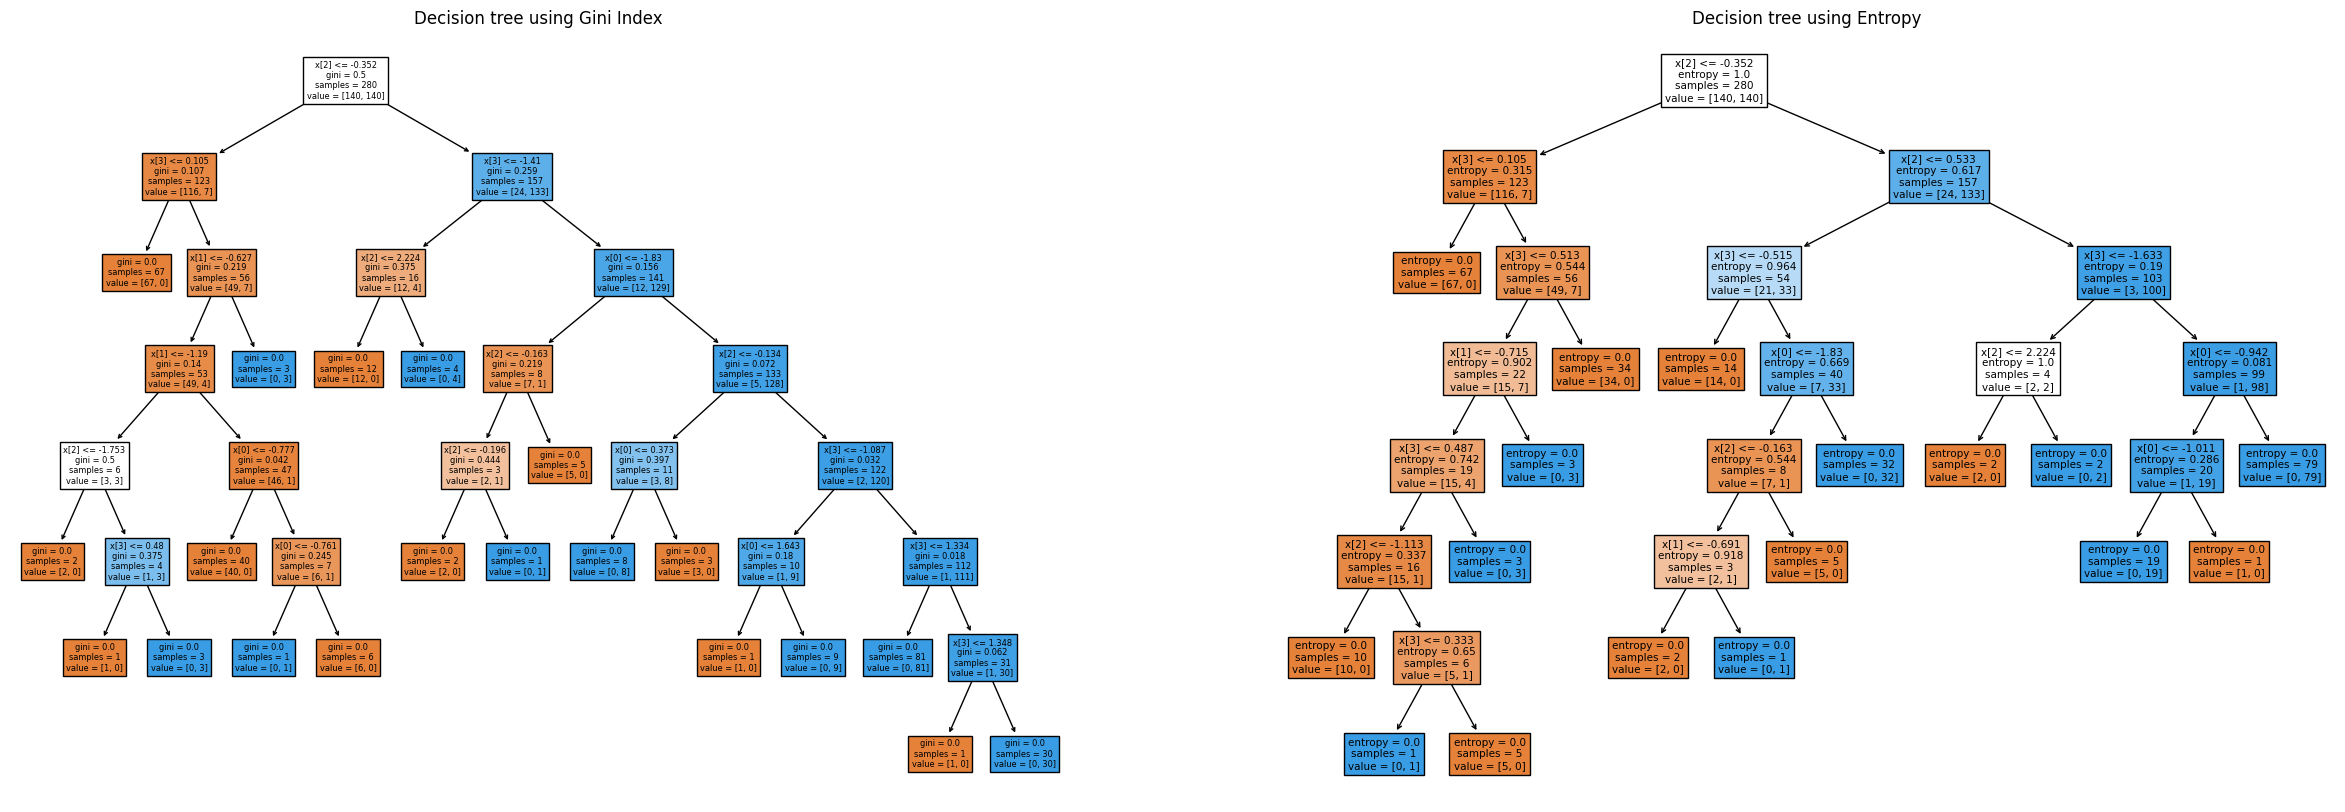

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

plot_tree(clf_gini, filled=True, ax=axes[0])
axes[0].set_title("Decision tree using Gini Index")

plot_tree(clf_entropy, filled=True, ax=axes[1])
axes[1].set_title("Decision tree using Entropy")

plt.show()

**C**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

Load the dataset

In [ ]:
df = pd.read_csv('Assignment 1-Dataset.csv')
df = df.drop(['Unnamed: 93', 'Unnamed: 94'], axis=1)

Drop features with weak correlations

In [ ]:
correlations = df.corr()['Target'].sort_values()
corr_threshold = 0.01
weak_corrs = correlations[abs(correlations) < corr_threshold].index
df = df.drop(columns=weak_corrs)

Define features and target

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

Split the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Apply SMOTE to the training data

In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Use Random Forest to determine feature importance

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
importances = rf.feature_importances_

Create a DataFrame for feature importances

In [ ]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Select the top N important features
top_n = 12
top_features = feature_importances.head(top_n)['feature']

Create new datasets with only the top features

In [ ]:
X_train_top = X_train_res[top_features]
X_test_top = X_test[top_features]

Train Decision Tree and Random Forest Classifier on the top features

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_top, y_train_res)
dt_y_pred = dt.predict(X_test_top)
print("Classification report for Decision Tree with top features:\n", classification_report(y_test, dt_y_pred))

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_top, y_train_res)
rf_y_pred = rf.predict(X_test_top)
print("Classification report for Random Forest with top features:\n", classification_report(y_test, rf_y_pred))


Classification report for Decision Tree with top features:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69     11443
           1       0.60      0.62      0.61      3568
           2       0.61      0.59      0.60      7250

    accuracy                           0.65     22261
   macro avg       0.63      0.64      0.64     22261
weighted avg       0.65      0.65      0.65     22261

Classification report for Random Forest with top features:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73     11443
           1       0.64      0.69      0.66      3568
           2       0.67      0.62      0.64      7250

    accuracy                           0.69     22261
   macro avg       0.67      0.68      0.68     22261
weighted avg       0.69      0.69      0.69     22261



**D**


Decision Tree for Regression


A Decision Tree for regression aims to predict continuous values by recursively splitting the data into subsets that minimize the variance of the target variable within each subset. Let's break this down further:

Splitting the Data

1. Selecting the Best Feature and Split Point:
   - At each node in the decision tree, the algorithm evaluates all possible splits across all features to find the split that results in the greatest reduction in variance of the target variable. This is done by:
     - Calculating the variance of the target variable for the current node (before splitting).
     - For each feature, considering every possible split point (midpoints between each pair of consecutive unique values of the feature).
     - Splitting the data at each candidate split point and calculating the weighted average variance of the target variable for the resulting subsets (left and right children).
   - The goal is to choose the feature and split point that minimize this weighted average variance, which effectively measures how well the split reduces the overall variability in the target variable.

2. Variance Reduction:
   - Variance reduction is a key metric for splitting. It can be mathematically represented as:

   $$ Variance(S) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

     where $y_i$ are the target values in set $S$, $\bar{y}$ is the mean target value in $S$, and $n$ is the number of data points in $S$.
   - When a node is split into two child nodes, $S_1$ and $S_2$, the weighted variance is:

   $$ WeightedVariance = \frac{|S_1|}{|S|} \text{Variance}(S_1) + \frac{|S_2|}{|S|} \text{Variance}(S_2) $$


    
   - The algorithm chooses the split that minimizes this weighted variance, thus maximizing the reduction in variance. The reduction in variance, also known as the reduction in impurity, is:

   $$ \Delta Variance = {Variance}(S) - {Weighted Variance} $$


Creating Leaf Nodes

The splitting process continues recursively until a stopping criterion is met. Stopping criteria can include:
- Maximum Depth: The tree stops growing when it reaches a pre-defined maximum depth.

- Minimum Samples per Leaf: The tree stops growing if a node contains fewer than a minimum number of samples.

- Minimum Reduction in Variance: The tree stops growing if the reduction in variance from splitting a node is less than a pre-defined threshold.
At each leaf node, the predicted value is the mean of the target values of the data points in that leaf.

Prediction

To make a prediction for a new data point, the algorithm starts at the root node and follows the decision rules down the tree until it reaches a leaf node. The prediction is the value of that leaf node, which is the average of the target values of the training data points in that leaf.


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Decision Tree Regressor MSE: 10.42
Decision Tree Regressor R2 Score: 0.86
Random Forest Regressor MSE: 7.90
Random Forest Regressor R2 Score: 0.89





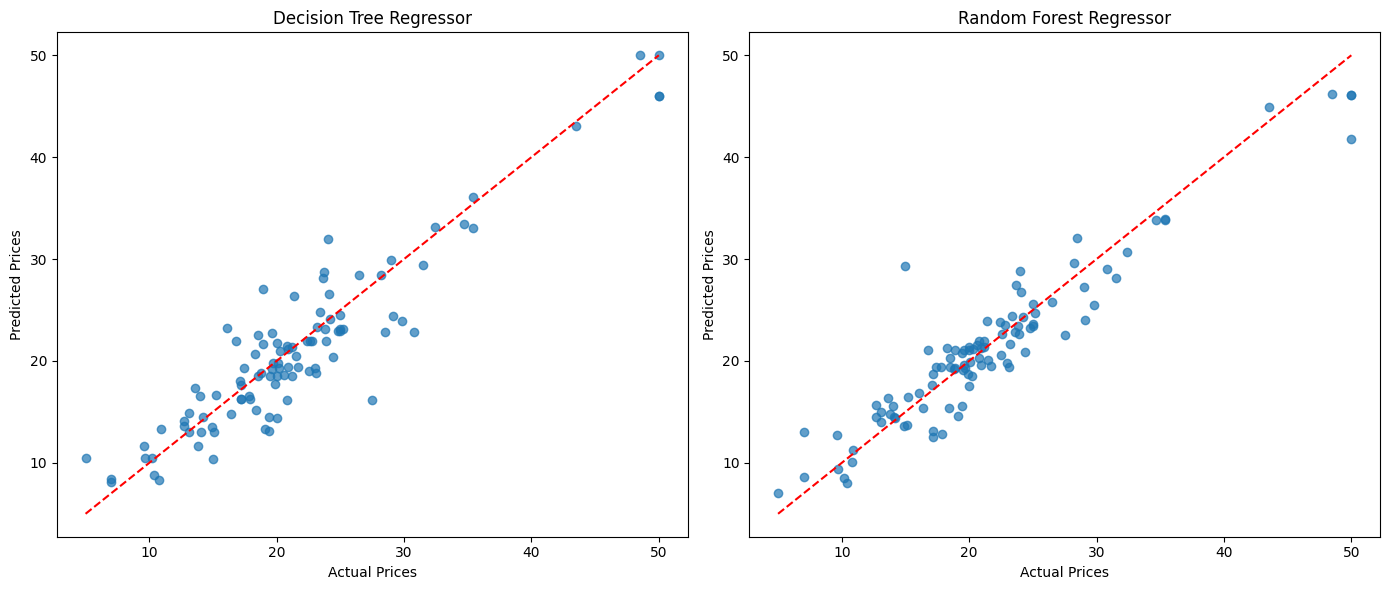

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

print(df.head())

X = df.drop(columns='medv')
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor MSE: {mse_dt:.2f}")
print(f"Decision Tree Regressor R2 Score: {r2_dt:.2f}")

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor MSE: {mse_rf:.2f}")
print(f"Random Forest Regressor R2 Score: {r2_rf:.2f}")
print("\n\n")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regressor")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Regressor")

plt.tight_layout()
plt.show()


# Quantum Computing

**A**

**Basis Encoding** is primarily used when real numbers have to be mathematically manipulated in the course of quantum algorithms. Such an encoding represents real numbers as binary numbers and then transforms them into a quantum state in the computational basis. The embedded quantum state is the bit-wise translation of a binary string to the corresponding states of the quantum subsystems. Hence, one bit of classical information is represented by one quantum subsystem. Acting on binary features encoded as qubits gives us the most computational freedom to design quantum algorithms. In principle, each operation on bits that we can execute on a classical computer can be done on a quantum computer as well.


For example, if you have a binary string of classical data, say '101', you can represent this data in a quantum system using three qubits. The first and third qubits would be in the state |1⟩, and the second qubit would be in the state |0⟩. So, the quantum state representing '101' would be |101⟩.

This method of encoding allows quantum algorithms to act in parallel on all bit sequences in superposition. This is one of the key advantages of quantum computing, as it allows for the exploration of multiple solution paths simultaneously.


**1. Integer Encoding:**
In quantum computing, integers can be represented in binary and encoded in the 0 or 1 basis. For example, the integer 3, which is 11 in binary, can be represented in a 4-qubit system as |0011⟩.

**2. Fixed-Point Representation:**
Fixed-point representation is a method used to represent real numbers (both integers and fractions) in binary. You choose a fixed number of qubits for the integer part and the fractional part. For example, you might use 6 qubits for the integer part and 4 qubits for the fractional part.

**3. Floating-Point Representation:**
Floating-point representation is another method used to represent real numbers in binary. It involves separate encoding for the sign, exponent, and mantissa. For example, to encode the numbers 0.1, -0.6, and 1.0 using 4 qubit precision and one qubit for sign, you would get:
- 0.1 -> 0 0001
- -0.6 -> 1 1001
- 1.0 -> 0 1000

The first bit represents the sign (0 for positive, 1 for negative), and the next four bits represent the number³.

**4. Vector Encoding:**
Vectors can also be encoded in quantum computing. For example, to encode the vector [010, 011] using 3 qubit precision, you would get |010011⟩. Each element of the vector is represented by a sequence of qubits.

In [ ]:
pip install qiskit==0.46.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=6e41b5345e568e053931d207e3e57656763f845a623b4565bf7a455ad0198e44
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
!pip install qiskit qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.6 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

Create a Quantum Circuit with 3 qubits and 3 classical bits

In [ ]:
circuit = QuantumCircuit(3, 3)

apply X gate to first and third qubit

In [ ]:
circuit.x(0)
circuit.x(2)


# Measure the qubits and store the result in classical bits



/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


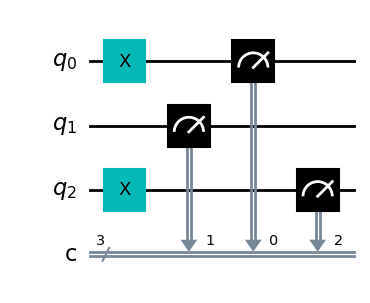

In [ ]:
circuit.measure([0, 1, 2], [0, 1, 2])
circuit.draw(output='mpl')

Execute the circuit on the qasm simulator

<ipython-input-9-12816a76b381>:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend('qasm_simulator')
<ipython-input-9-12816a76b381>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend, shots=1024)


{'101': 1024}


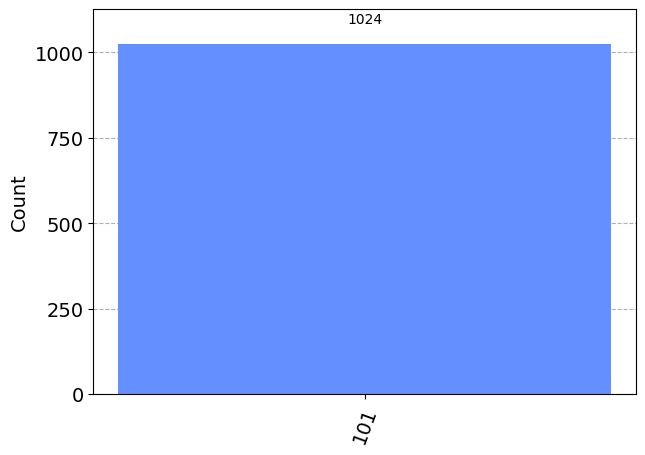

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1024)
result = job.result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)




**Amplitude Encoding** is a technique used in quantum computing to represent classical data in a quantum state. It's a foundational concept in quantum algorithms, with applications in various fields, including quantum machine learning, cryptography, and optimization. The main advantage of amplitude encoding is that it enables quantum computers to handle and process vast amounts of data more efficiently and explore multiple solution paths in parallel.


In amplitude encoding, the amplitudes of a quantum state are used to represent data values. This means that we can encode `n` real values using `O(log(n))` qubits. This is because a quantum state of `n` qubits is a superposition of `2^n` basis states, and we can use the amplitudes of these basis states to encode `2^n` real numbers.

Now, let's look at an example:

Consider the vector X = (0.1, -0.7, 1.0). In amplitude encoding, we first normalize it to unit length and pad it with zeros to a dimension of integer logarithm. So, we get X' = (0.081, -0.571, 0.816, 0.000). Now it can be represented by a quantum state of 2 qubits:

$$ 0.081 |00⟩ - 0.571 |01⟩ + 0.816 |10⟩ + 0.000 |11⟩ $$

This state would at the same time encode the matrix as:

$$ A = \begin{bmatrix}
0.081 & -0.571 \\
0.816 & 0.000
\end{bmatrix}
$$

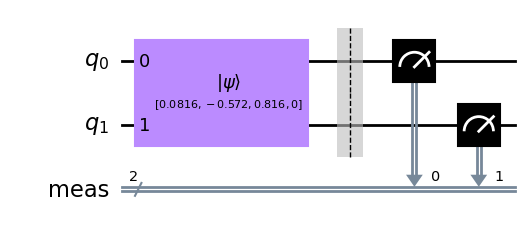

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

values = [0.1, -0.7, 1.0, 0]

norm = np.linalg.norm(values)
values = values / norm

qc_amplitude = QuantumCircuit(2)
qc_amplitude.initialize(values, [0, 1])
qc_amplitude.measure_all()
qc_amplitude.draw(output='mpl')


In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc_amplitude, simulator, shots=1024)
result = job.result()

counts = result.get_counts()
print(counts)

{'00': 6, '10': 674, '01': 344}


<ipython-input-30-3f2ccfa050f7>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc_amplitude, simulator, shots=1024)


In [ ]:
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}

print("Probabilities:", probabilities)
squared_norm_values = [val**2 for val in values]

print("Squared Normalized Values:", squared_norm_values)

Probabilities: {'00': 0.005859375, '10': 0.658203125, '01': 0.3359375}
Squared Normalized Values: [0.006666666666666668, 0.32666666666666677, 0.6666666666666669, 0.0]


**B**


#### Quantum Gates
- **Hadamard Gate (H):** Creates a superposition state. When applied to a qubit in state $|0>,$ it transforms it into $ \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) $. Applied twice, it returns the qubit to its original state.
- **X Gate:** Equivalent to the classical NOT gate. It flips the state of a qubit, changing |0> to |1> and vice versa.

Let's analyze the circuit.

   - Qubit q0 and q1 start in state |0>.

   - After the first H gate on $q0$, it goes into a superposition state:
$$ |q0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) $$

   - The second H gate on $q0$ changes its state back to $|0>$ (since applying H twice returns it to its original state):
$$ |q0\rangle = |0\rangle $$
    

   - The first X gate on $q1$ flips its state from $|0>$ to $|1>$:
$$ |q1\rangle = |1\rangle $$

- After the H gate on $q1$, it goes into a superposition state:
$$ |q1\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) $$


   - The second X gate on $q1$ flips its state back from $|1>$ to $|0>$:
$$ |q1\rangle = |0\rangle $$


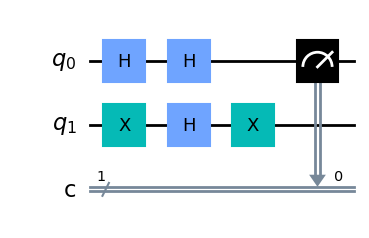

In [ ]:
circuit = QuantumCircuit(2, 1)

circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.x(1)
circuit.h(0)

circuit.measure(0, 0)
circuit.draw(output='mpl')

<ipython-input-16-0064fbdfcef1>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend, shots=1024)


{'0': 1024}


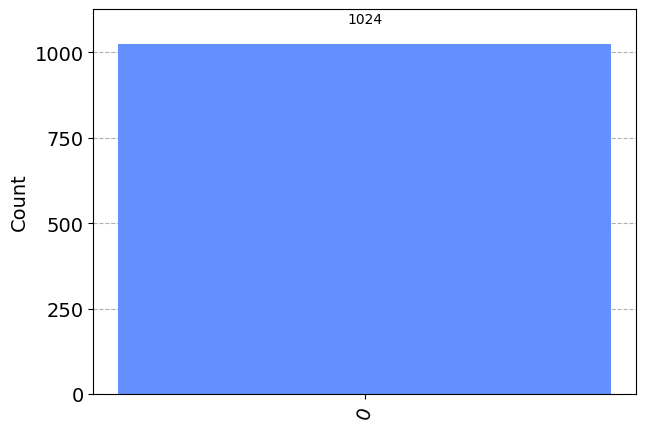

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1024)
result = job.result()

counts = result.get_counts()

print(counts)
plot_histogram(counts)

<ipython-input-18-3733a86c15a0>:9: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend, shots=1024)


{'0': 508, '1': 516}


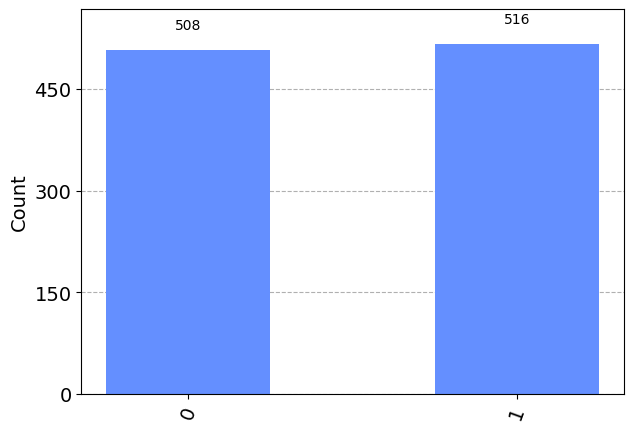

In [ ]:
circuit = QuantumCircuit(1, 1)

circuit.x(0)
circuit.h(0)
circuit.x(0)

circuit.measure(0, 0)
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)
